In [1]:
from PIL import Image
from mmdet.apis import DetInferencer
import glob

/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/mmengine/optim/optimizer/zero_optimizer.py:11: DeprecationWarning: `TorchScript` support for functional optimizers is deprecated and will be removed in a future PyTorch release. Consider using the `torch.compile` optimizer instead.
  from torch.distributed.optim import \


[2024-10-06 12:17:36,692] [INFO] [real_accelerator.py:203:get_accelerator] Setting ds_accelerator to cuda (auto detect)


/anaconda/envs/azureml_py310_sdkv2/compiler_compat/ld: cannot find -laio: No such file or directory
collect2: error: ld returned 1 exit status
/anaconda/envs/azureml_py310_sdkv2/compiler_compat/ld: warning: libstdc++.so.6, needed by /usr/local/cuda/lib64/libcufile.so, not found (try using -rpath or -rpath-link)
/anaconda/envs/azureml_py310_sdkv2/compiler_compat/ld: warning: libm.so.6, needed by /usr/local/cuda/lib64/libcufile.so, not found (try using -rpath or -rpath-link)
/anaconda/envs/azureml_py310_sdkv2/compiler_compat/ld: /usr/local/cuda/lib64/libcufile.so: undefined reference to `std::runtime_error::~runtime_error()@GLIBCXX_3.4'
/anaconda/envs/azureml_py310_sdkv2/compiler_compat/ld: /usr/local/cuda/lib64/libcufile.so: undefined reference to `__gxx_personality_v0@CXXABI_1.3'
/anaconda/envs/azureml_py310_sdkv2/compiler_compat/ld: /usr/local/cuda/lib64/libcufile.so: undefined reference to `std::ostream::tellp()@GLIBCXX_3.4'
/anaconda/envs/azureml_py310_sdkv2/compiler_compat/ld: /usr

In [11]:
# Choose to use a config
config = 'configs/conditional_detr/obj_detection_config.py'
# Setup a checkpoint file to load
checkpoint = glob.glob('./work_dirs/obj_detection_config/best_coco_bbox_mAP_epoch_190.pth')[0]

# Set the device to be used for evaluation
device = 'cuda:0'

# Initialize the DetInferencer
inferencer = DetInferencer(config, checkpoint, device)

# Use the detector to do inference
img = '/home/azureuser/cloudfiles/code/datasets/screen_obj_detection/train/ax0_1031140c-054d-4076-9e27-d053ec6a6fa6_0c01b58c-eb12-4ab9-824a-e15e9107c45c.jpg'
result = inferencer(img, out_dir='./output')

Loads checkpoint by local backend from path: ./work_dirs/obj_detection_config/best_coco_bbox_mAP_epoch_190.pth


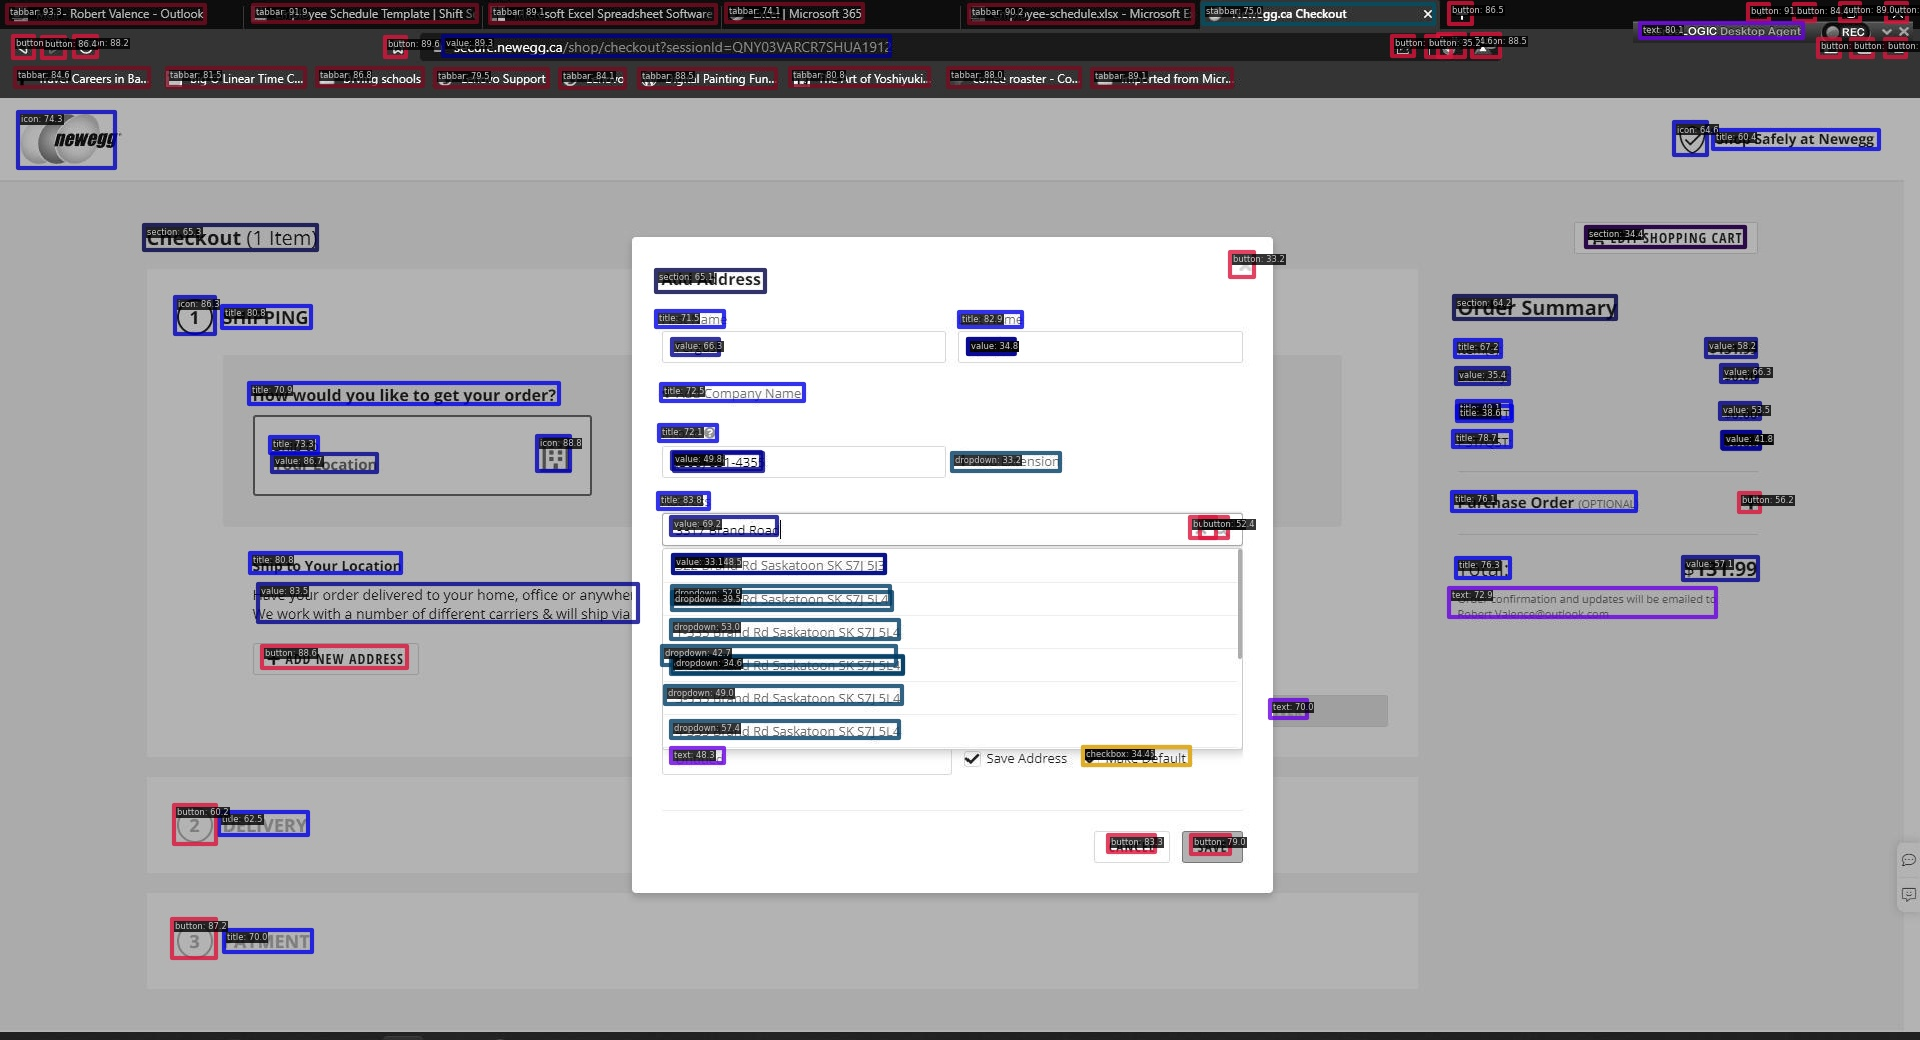

In [12]:
Image.open('./output/vis/ax0_1031140c-054d-4076-9e27-d053ec6a6fa6_0c01b58c-eb12-4ab9-824a-e15e9107c45c.jpg')